In [2]:
import pandas as pd
df = pd.read_csv(r'titanic/train.csv', usecols= ['Pclass', 'Age', 'Fare', 'Survived'])
testset = pd.read_csv(r'titanic/test.csv', usecols= ['Pclass', 'Age', 'Fare'])
Y_test = pd.read_csv(r'titanic/gender_submission.csv')
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
# replacing NA values in age column with the median age
df['Age'].fillna(df.Age.median(), inplace = True)
testset['Age'].fillna(df.Age.median(), inplace= True)
testset['Fare'].fillna(df.Age.median(), inplace= True)

In [32]:
# just to verify if there is any NA (null) values in any of the columns
df.isnull().sum()                   
testset.isnull().sum()

,Pclass,Age,Fare
0,3,34.5,7.8292
1,3,47.0,7.0000
2,2,62.0,9.6875
3,3,27.0,8.6625
4,3,22.0,12.2875
...,...,...,...
413,3,28.0,8.0500
414,1,39.0,108.9000
415,3,38.5,7.2500
416,3,28.0,8.0500


In [37]:
# dividing them into independent and dependent features
X_train = df.iloc[ :, 1:]
Y_train = df.iloc[:, 0]
X_test = testset.iloc[:, :]
Y_test = Y_test.iloc[:,1]

In [19]:
#### standardisation :  We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.82737724, -0.56573646, -0.50244517],
       [-1.56610693,  0.66386103,  0.78684529],
       [ 0.82737724, -0.25833709, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 , -0.17626324],
       [-1.56610693, -0.25833709, -0.04438104],
       [ 0.82737724,  0.20276197, -0.49237783]])

In [39]:
X_test_scaled = scaler.transform(X_test)

In [40]:
### Applying Machine Learning algorithm for building a model based on the training set to predict which passengers had survived
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train_scaled, Y_train)
classification.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

### Min Max Scaling (CNN) --- Deep Learning Technique
Min Max scales the values between 0 and 1. X_scaled = X - X.min / X.Max - X.min

In [45]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv(r'titanic/train.csv', usecols= ['Pclass', 'Age', 'Fare', 'Survived'])
testset = pd.read_csv(r'titanic/test.csv', usecols= ['Pclass', 'Age', 'Fare'])
Y_test = pd.read_csv(r'titanic/gender_submission.csv')
minmax = MinMaxScaler()
dfminmax = pd.DataFrame(minmax.fit_transform(df), columns = df.columns)
X_train = dfminmax.iloc[:, 1:]
Y_train = dfminmax.iloc[:, 0]
X_test = pd.DataFrame(minmax.fit_transform(testset), columns=testset.columns)
Y_test = pd.DataFrame(minmax.fit_transform(Y_test), columns = Y_test.columns)

In [49]:
print(dfminmax)
print(X_test)

     Survived  Pclass       Age      Fare
0         0.0     1.0  0.271174  0.014151
1         1.0     0.0  0.472229  0.139136
2         1.0     1.0  0.321438  0.015469
3         1.0     0.0  0.434531  0.103644
4         0.0     1.0  0.434531  0.015713
..        ...     ...       ...       ...
886       0.0     0.5  0.334004  0.025374
887       1.0     0.0  0.233476  0.058556
888       0.0     1.0       NaN  0.045771
889       1.0     0.0  0.321438  0.058556
890       0.0     1.0  0.396833  0.015127

[891 rows x 4 columns]
     Pclass       Age      Fare
0       1.0  0.452723  0.015282
1       1.0  0.617566  0.013663
2       0.5  0.815377  0.018909
3       1.0  0.353818  0.016908
4       1.0  0.287881  0.023984
..      ...       ...       ...
413     1.0       NaN  0.015713
414     0.0  0.512066  0.212559
415     1.0  0.505473  0.014151
416     1.0       NaN  0.015713
417     1.0       NaN  0.043640

[418 rows x 3 columns]


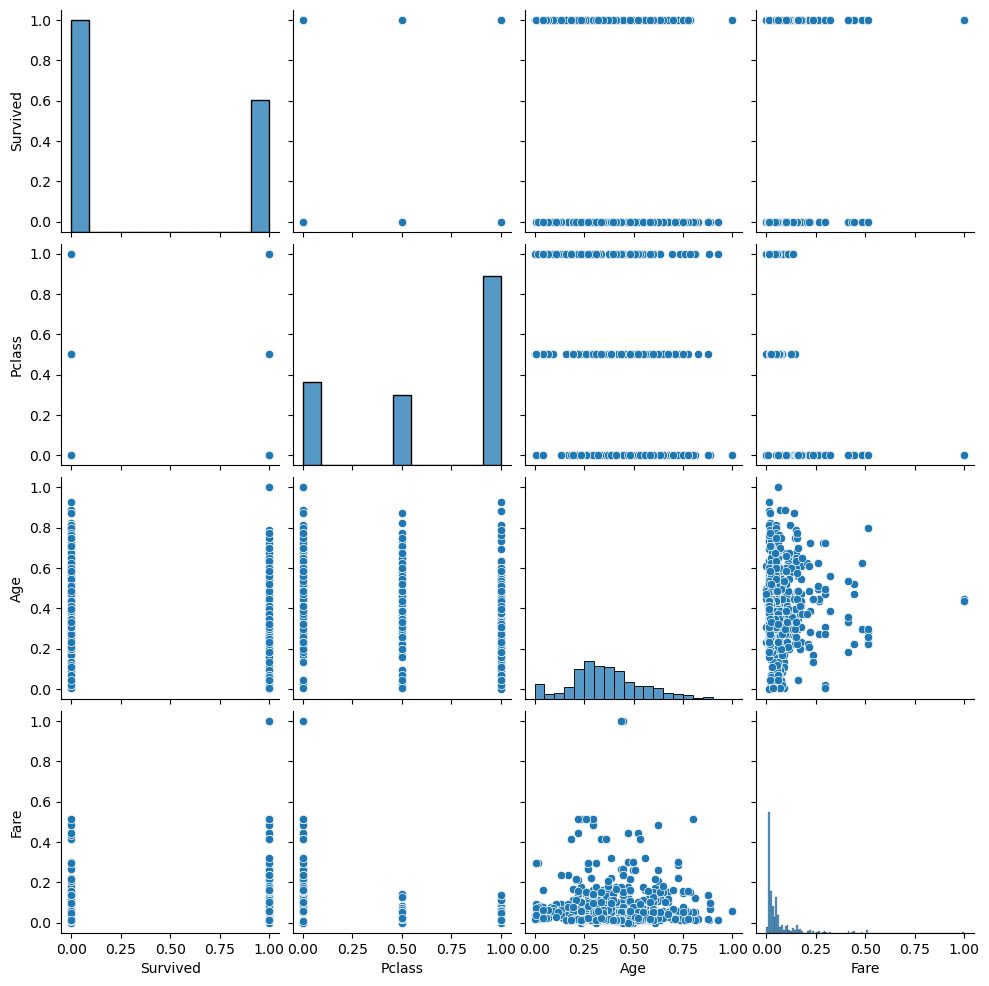

In [51]:
import seaborn as sns
sns.pairplot(dfminmax)

### Robust Scaling
Robust Scalers are robust towards outliers. It is used to scale features to their median and quantiles. 
IQR = 75th Quantile - 25th Quantile
X_scaled = (X - X.median) / IQR


In [3]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363


### Gaussian Transformation methods transform the data into a Gaussian Distribution

In [6]:
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt

In [7]:
def plot_data(df, feature):
    plt.figure(figsize = (10,6)) 
    plt.subplot(1,2,1)
    df[feature].hist()
    
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist="norm", plot = pylab)
    plt.show()

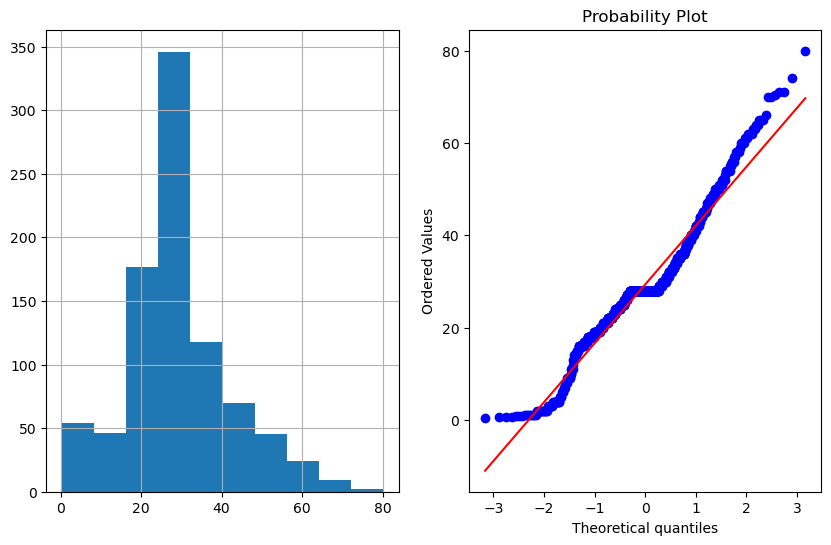

In [8]:
##  this distribution is more of a right skewed distribution (a logarithmic distribution)
plot_data(df, 'Age')


### Logarithmic Transformation

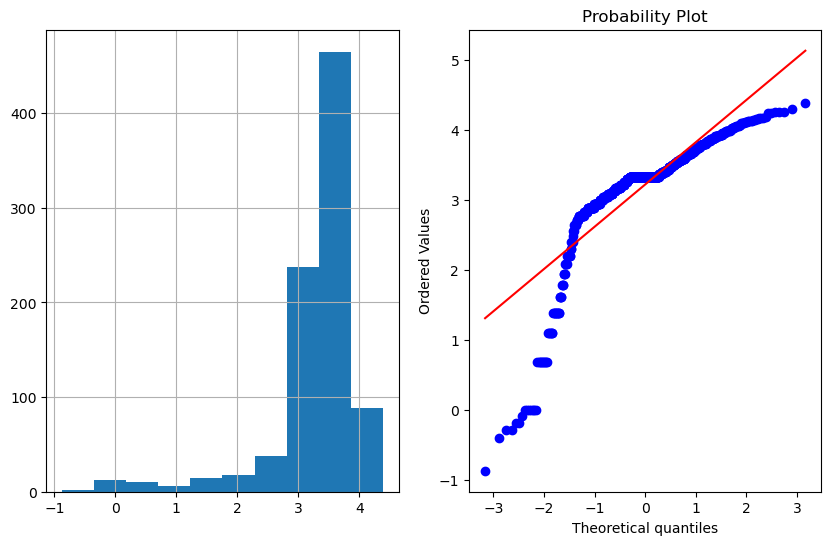

In [9]:

import numpy as np
## this will convert the right skewed data into a left skewed transformation
df["Age_log"]= np.log(df["Age"])

plot_data(df, "Age_log")

### Reciprocal Transformation

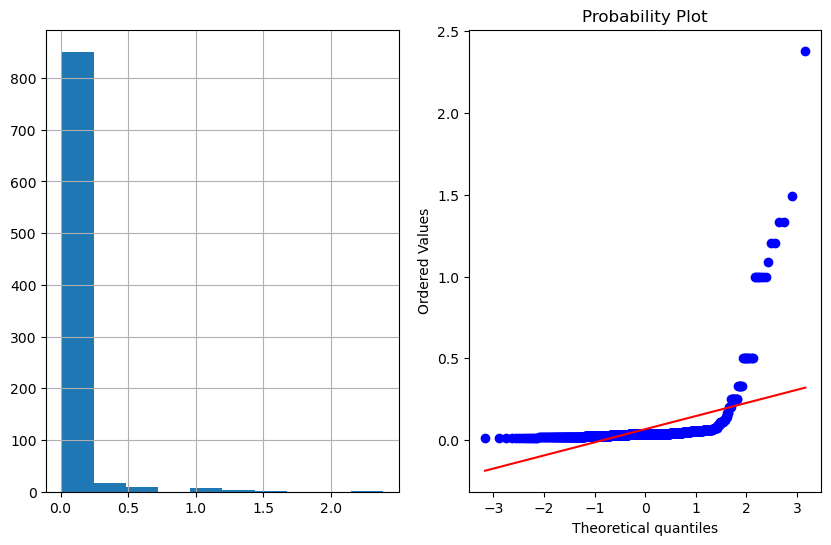

In [10]:
df["Age_reciprocal"] = 1/df.Age
plot_data(df, "Age_reciprocal")

### Square root transformation

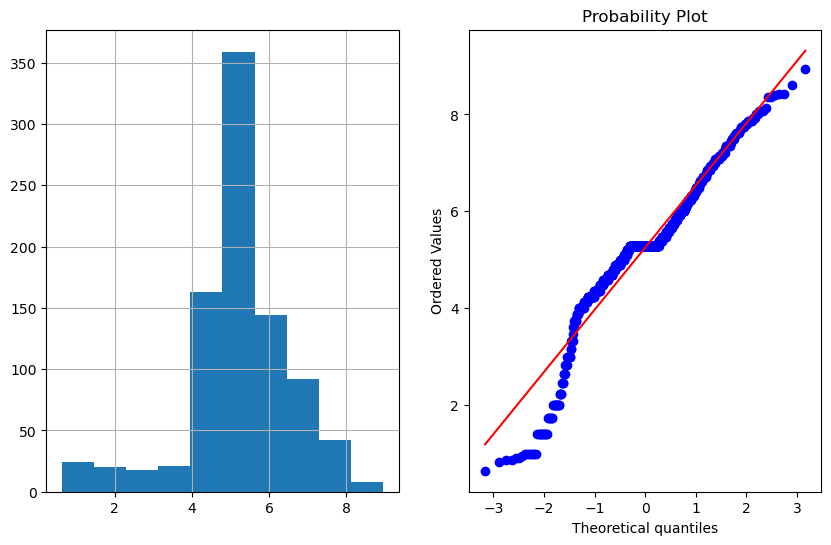

In [12]:
## Almost serves our purpose, but we still can do better
df["Age_sqroot"] = df["Age"] ** 0.5
plot_data(df, "Age_sqroot")

### Exponential Transformation

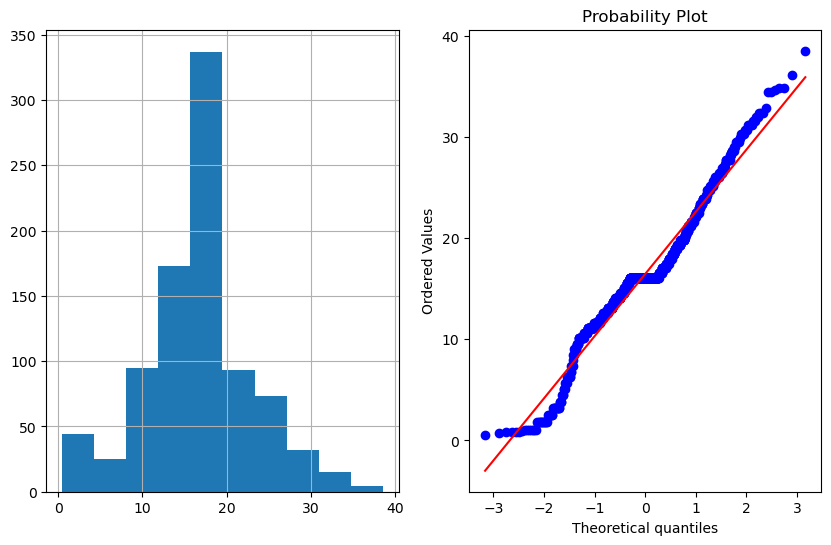

In [13]:
### This will create a even better result
df["Age_exponential"] = df.Age ** (1/1.2)
plot_data(df, "Age_exponential")

### Box Cox Transformation
Defined as :
$T(Y) =  \frac {Y e ^{\lambda} -1 } {\lambda}$

where Y is the response variable and $\lambda$ is the transformation parameter. $\lambda$ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [14]:
df['Age_Boxcox'], parameters = stat.boxcox(df['Age'])
print(parameters)

0.7964531473656952


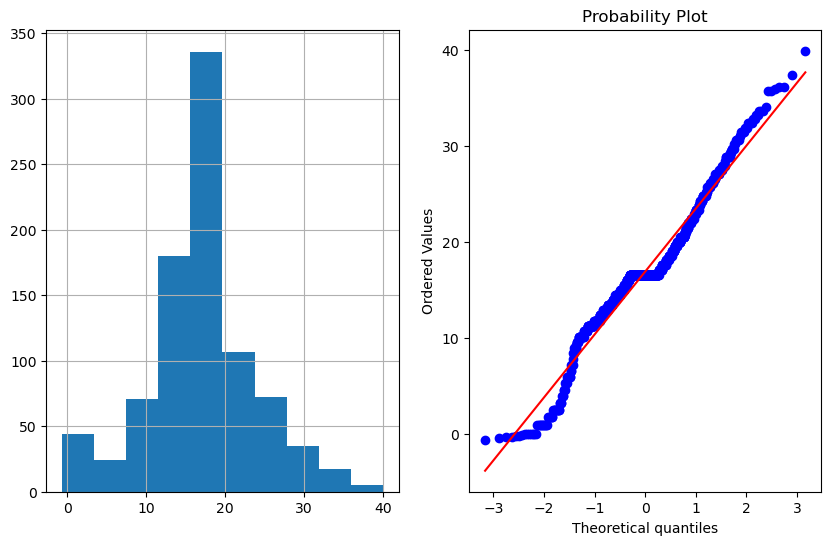

In [15]:
plot_data(df, 'Age_Boxcox')